In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import pickle
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

In [2]:
# column_names=['age','sex','chest pain type','resting blood pressure','serum cholestoral in mg/dl','fasting blood sugar>120 mg/dl','resting electrocardiographic results','maximum heart rate achieved','exercise induced angina','oldpeak','the slope of the peak exercise ST segment','number of major vessels (0-3) colored by flourosopy','thal','status']
heart_disease = pd.read_csv("heart_new.csv",)
heart_disease.head(10)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
heart_disease.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
heart_disease['ChestPainType']=heart_disease['ChestPainType'].map({'TA':1,'ATA':2,'NAP':3,'ASY':4})
heart_disease['RestingECG']=heart_disease['RestingECG'].map({'Normal':1,'ST':2,'LVH':3})
heart_disease['ExerciseAngina']=heart_disease['ExerciseAngina'].map({'N':0,'Y':1})
heart_disease['ST_Slope']=heart_disease['ST_Slope'].map({'Up':1,'Flat':0.5,'Down':0})

In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    float64
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 86.2+ KB


In [6]:
heart_disease.shape

(918, 12)

In [7]:
heart_disease.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(heart_disease.drop(['Sex','HeartDisease'],axis=1), heart_disease['HeartDisease'], test_size=0.33, random_state=55)

In [9]:
model1 = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.001, max_depth=4, random_state=55)

In [10]:
model1.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=4, n_estimators=10000,
                           random_state=55)

In [11]:
y_pred1 = model1.predict(X_test)
print(y_pred1)
accuracy = model1.score(X_test, y_test)
print(accuracy)
print(f"GradientBoostingClassifier Model accuracy : {round(acc(y_test, y_pred1) * 100, 2)}%")


[0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0
 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1]
0.8646864686468647
GradientBoostingClassifier Model accuracy : 86.47%


In [12]:
f1 = f1_score(y_test, y_pred1)
print("F1 Score: ", f1)

F1 Score:  0.8768768768768769


In [13]:

roc_auc = roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1])

print("ROC-AUC: ", roc_auc)

ROC-AUC:  0.921256038647343


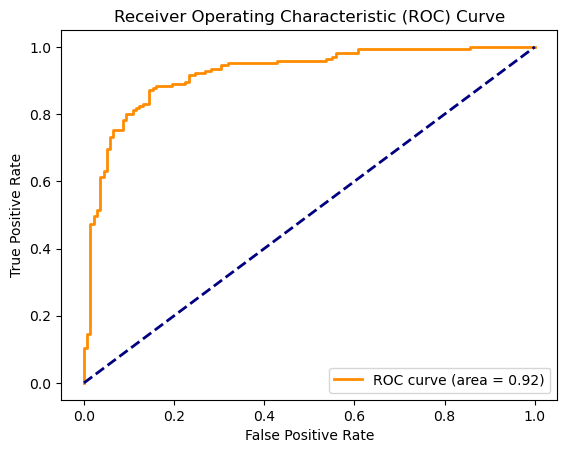

In [35]:
y_score = model1.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
cm = confusion_matrix(y_test, y_pred1)

TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

print("True Positive (TP):", TP)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

True Positive (TP): 146
False Positive (FP): 22
False Negative (FN): 19


In [15]:
def calculate_metrics(TP, FP, FN):
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    
    if recall + precision == 0:
        f_measure = 0
    else:
        f_measure = 2 * (precision * recall) / (precision + recall)
    
    return recall, precision, f_measure

recall, precision, f_measure = calculate_metrics(TP, FP, FN)

print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F-measure: {:.2f}".format(f_measure))

Recall: 0.88
Precision: 0.87
F-measure: 0.88


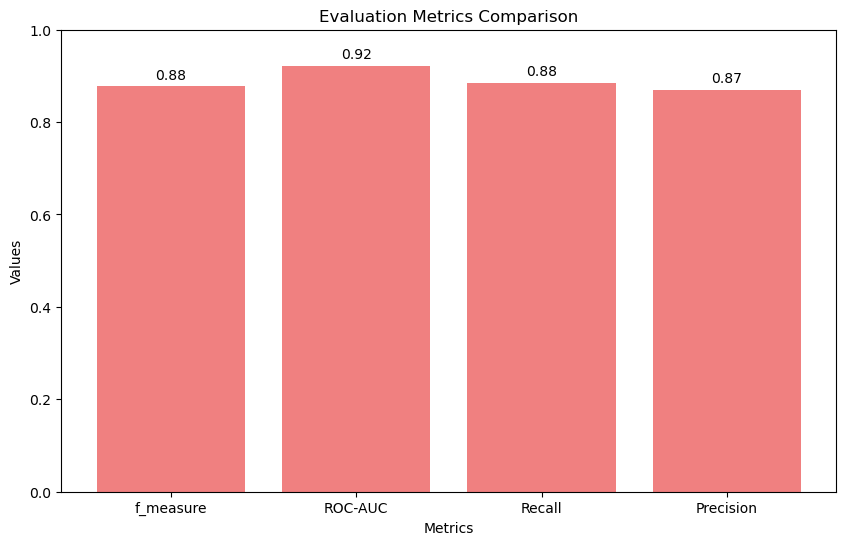

In [16]:
import matplotlib.pyplot as plt

metrics = ['f_measure', 'ROC-AUC', 'Recall', 'Precision', ]
values = [f_measure,roc_auc, recall, precision]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='lightcoral')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics Comparison')
plt.ylim(0, 1)

for index, value in enumerate(values):
    plt.text(index, value + 0.01, "{:.2f}".format(value), ha='center', va='bottom')

plt.show()

In [17]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:

accuracy = model2.score(X_test, y_test)
y_pred2 = model2.predict(X_test)
print(f"XGBClassifier Model accuracy : {round(acc(y_test, y_pred2) * 100, 2)}%")
accuracy

XGBClassifier Model accuracy : 82.84%


0.8283828382838284

In [19]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': np.linspace(0.001, 0.1, num=100),
    'n_estimators': [100, 200, 300, 400, 500],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5]
}

random_search = RandomizedSearchCV(model2, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters: ", random_search.best_params_)
print("Best accuracy: ", random_search.best_score_)

Best parameters:  {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.038, 'gamma': 0, 'colsample_bytree': 0.6}
Best accuracy:  0.8666666666666666


In [20]:
model6 = LGBMClassifier(learning_rate=0.001, n_estimators=1000)
# model6 = LGBMClassifier()
model6.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 343, number of negative: 272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557724 -> initscore=0.231928
[LightGBM] [Info] Start training from score 0.231928
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(learning_rate=0.001, n_estimators=1000)

In [21]:
y_pred6 = model6.predict(X_test)
print(f"LGBMClassifier Model accuracy : {round(acc(y_test,y_pred6) * 100, 2)}%")

LGBMClassifier Model accuracy : 83.83%


In [22]:
model3 = svm.SVC()
model3.fit(X_train, y_train)

SVC()

In [23]:
y_pred3 = model3.predict(X_test)
print(f"SVM Model accuracy : {round(acc(y_test, y_pred3) * 100, 2)}%")

SVM Model accuracy : 75.58%


In [24]:
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred4 = model4.predict(X_test)
print(f"RandomForestClassifier Model accuracy : {round(acc(y_test, y_pred4) * 100, 2)}%")

RandomForestClassifier Model accuracy : 86.47%


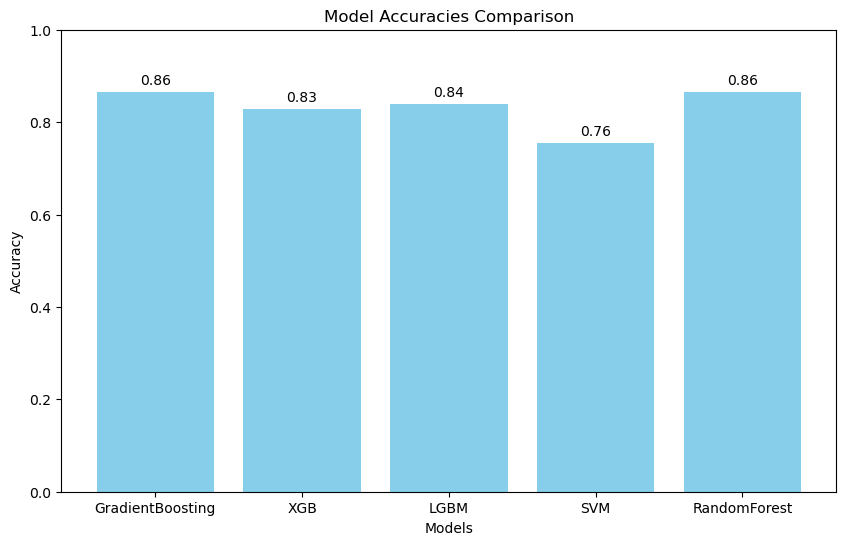

In [26]:
import matplotlib.pyplot as plt

models = ['GradientBoosting', 'XGB', 'LGBM', 'SVM', 'RandomForest']
accuracies = [acc(y_test, y_pred1), acc(y_test, y_pred2), acc(y_test,y_pred6), acc(y_test, y_pred3), acc(y_test, y_pred4)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 1)

for index, value in enumerate(accuracies):
    plt.text(index, value + 0.01, "{:.2f}".format(value), ha='center', va='bottom')

plt.show()

In [27]:
y_test

35     0
527    0
812    0
550    1
671    1
      ..
903    0
281    1
707    1
211    1
562    0
Name: HeartDisease, Length: 303, dtype: int64

In [28]:
age=float(input("Enter Your Age: "))
sex=(input("Enter Your Gender: "))
chest_pain_type=float(input("Enter Your Chest Pain Type(0-4): "))
resting_blood_pressure=float(input("Enter Your Resting Blood Pressure: "))
serum_cholestrol=float(input("Enter Your Serum Cholestoral In mg/dl: "))
fasting_blood_sugar=float(input("Enter Your Fasting Blood Sugar: "))
resting_electrocardiographic_results=float(input("Enter Your Resting Electrocardiographic Results(0,1,2): "))
maximum_heart_rate_achieved=float(input("Enter Your Maximum Heart Rate Achieved: "))
exercise_induced_angina=float(input("Enter Your Exercise Induced Angina: "))
oldpeak=float(input("Enter Your Oldpeek: "))
slope_of_the_peak_exercise_ST_segment=float(input("Enter The Slope Of The Peak Exercise ST Segment: "))

In [29]:
# 41	M	ASY(4)	130	172	0	ST(2)	130	N(0)	2	Flat(0.5)	1


In [30]:
prop=[]
prop.extend([age,chest_pain_type,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,fasting_blood_sugar,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_the_peak_exercise_ST_segment])

In [31]:
prop_data=pd.DataFrame(columns=['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])

In [32]:
prop_data.loc[len(prop)] = prop

In [33]:
pred=model1.predict(prop_data)
if(pred==1):
    print("RISK")
else:
    print("NO RISK")

RISK


In [34]:
pickle.dump(model1, open('model.heart_disease_new', 'wb'))